In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
#Define constants
m = 39.95*1.68*10**(-27)
epsilon = 119.8/1.381*10**(-23)
sigma = 3.405 #angstrom
h = 10**-6 #Timestep

In [4]:
#Potential function

def r(x,y):
    r_pos = np.sqrt(x**2+y**2)
    return r_pos

def Grad_potential(x_1, y_1, x_2, y_2, epsilon = 119.8/1.381*10**(-23), sigma = 3.405):
    direction = np.array([(x_1 - x_2), (y_1 - y_2)])
    r = np.sqrt((x_1 - x_2)**2+(y_1 - y_2)**2)
    U_partial_r = 4 *epsilon* (12*((sigma)**(12))*(-1/r)**13 - 6*((sigma)**(6))*(-1/r)**7)
    grad_U = U_partial_r * direction *r**(-1)
    return grad_U

In [5]:
def boxcheck (x, y):
    x_upper_limit = 5.0
    y_upper_limit = 5.0
    
    x_lower_limit = 0
    y_lower_limit = 0
    
    l = x_upper_limit - x_lower_limit #length of the box, only works for squares
    
    if x < x_upper_limit and x > x_lower_limit:
        if y < y_upper_limit and y > y_lower_limit:
            return np.array([x, y])
        if y > y_upper_limit:
            return np.array([x, y -l])
        if y < y_lower_limit:
            return np.array([x, y +l])
    if x > x_upper_limit:
        if ( y < y_upper_limit and y > y_lower_limit):
            return np.array([x- l, y])
        if y > y_upper_limit:
            return np.array([x- l, y - l])
        if y < y_lower_limit:
            return np.array([x- l, y + l])
    if x < x_lower_limit:
        if ( y < y_upper_limit and y > y_lower_limit):
            return np.array([x + l, y])
        if y > y_upper_limit:
            return np.array([x + l, y - l])
        if y < y_lower_limit:
            return np.array([x + l, y + l])

        
        
#Class for argon particles
        
class Particle:
    
    mass = 39.95*1.68*10**(-27)
    def __init__(self, position, velocity):
        self.pos = position
        self.vel = velocity

In [ ]:
#Put initial values in 2D arrays
#Random particle initial conditions

x_1 = random.uniform(0, 5.0)
y_1 = random.uniform(0, 5.0)
x_2 = random.uniform(0, 5.0)
y_2 = random.uniform(0, 5.0)

vx_1 = random.uniform(-50.0, 50.0)
vy_1 = random.uniform(-50.0, 50.0)
vx_2 = random.uniform(-50.0, 50.0)
vy_2 = random.uniform(-50.0, 50.0)

part_1  = np.array([[x_1],[y_1],[vx_1],[vy_1]]) #starting position and velocity for particle 1
part_2  = np.array([[x_2],[y_2],[vx_2],[vy_2]]) #starting position and velocity for particle 2

In [6]:
# Loop to initialize the particles, it still needs implementation


# n_particles = 5

# for i in range(n_particles):
    
#     x = random.uniform(0, 10.0)
#     y = random.uniform(0, 10.0)
#     position = np.array([[x],[y]])
    
#     vx = random.uniform(-5.0, 5.0)
#     vy = random.uniform(-5.0, 5.0)
#     velocity = np.array([[vx],[vy]])
    

#     particle_str(i) = Particle(position, velocity)


In [7]:

#Now loop 100 times over the functions to get the new positions and velocities
timesteps = 100

for i in range(timesteps):
    #The constants don't have to be declared again in the Grad_potential function
    vx_1new = part_1[2,-1] - (Grad_potential(part_1[0,-1], part_1[1,-1], part_2[0,-1], part_2[1,-1])[0])*h/m
    vy_1new = part_1[3,-1] - (Grad_potential(part_1[0,-1], part_1[1,-1], part_2[0,-1], part_2[1,-1])[1])*h/m
    vx_2new = part_2[2,-1] - (Grad_potential(part_2[0,-1], part_2[1,-1], part_1[0,-1], part_1[1,-1])[0])*h/m
    vy_2new = part_2[3,-1] - (Grad_potential(part_2[0,-1], part_2[1,-1], part_1[0,-1], part_1[1,-1])[1])*h/m
    x_1new = part_1[0,-1] + part_1[2,-1]*h
    y_1new = part_1[1,-1] + part_1[3,-1]*h
    x_2new = part_2[0,-1] + part_2[2,-1]*h
    y_2new = part_2[1,-1] + part_2[3,-1]*h

    #Check if the particle is inside the box
    position_check_part1 = boxcheck(x_1new, y_1new)
    position_check_part2 = boxcheck(x_2new, y_2new)
    
    #add the new values for the x,y positions and velocities to the arrays for particles 1 and 2
    part_1_new = np.array([[position_check_part1[0]], [position_check_part1[1]], [vx_1new],[vy_1new]])
    part_1 = np.append(part_1, part_1_new, axis = 1)
    
    part_2_new = np.array([[position_check_part2[0]],[position_check_part2[1]], [vx_2new],[vy_2new]])
    part_2 = np.append(part_2, part_2_new, axis = 1)
    
print(part_1[0])
print(part_2[0])

[   4.31071339    4.31070335    4.30907226    4.30582007    4.30131126
    4.29603647    4.29036479    4.28450186    4.27854794    4.27255006
    4.26653036    4.26049953    4.25446284    4.24842301    4.24238143
    4.23633889    4.23029448    4.22424649    4.21819142    4.21212204
    4.20602299    4.19986073    4.19355964    4.18694444    4.17959905
    4.17052914    4.15744412    4.13579932    4.09995211    4.0502857
    3.99443737    3.9370279     3.87926185    3.82140636    3.76352575
    3.70563738    3.64774901    3.58986062    3.53197223    3.47408383
    3.41619543    3.35830705    3.30041871    3.24253051    3.18464267
    3.12675569    3.0688708     3.01099092    2.95312313    2.89528463
    2.83751665    2.77991516    2.72269035    2.66625598    2.61129613
    2.55866022    2.50895864    2.46210017    2.4173223     2.37372117
    2.33066323    2.28782336    2.24506382    2.20233247    2.15961077
    2.11689233    2.07417579    2.03146467    1.98876967    1.94612544
    1.9

In [8]:
#Three particles
#Would be nice to be able to adjust number of particles by one change
#Create one very big array, or one array per particle?
# number_of_particles = 3
#maybe make another function out of generating the initial conditions and of steps in the cell above

#Create the positions and velocities randomly for particle_1
# N_variables = 4 #2 positions and 2 velocities
# part1 = [[random.uniform(-5,5) for i in range(1)] for j in range(N_variables)]


#Doesn't work yet:
"""
def initial_conditions(number_of_particles):
    for j < number_of_particles:
        "part_" + str(j)  = np.array([[random.uniform(-5, 5)],[random.uniform(-5, 5)],[random.uniform(-5, 5)],[random.uniform(-5, 5)]])
return "part_" + str(j) 
"""

'\ndef initial_conditions(number_of_particles):\n    for j < number_of_particles:\n        "part_" + str(j)  = np.array([[random.uniform(-5, 5)],[random.uniform(-5, 5)],[random.uniform(-5, 5)],[random.uniform(-5, 5)]])\nreturn "part_" + str(j) \n'

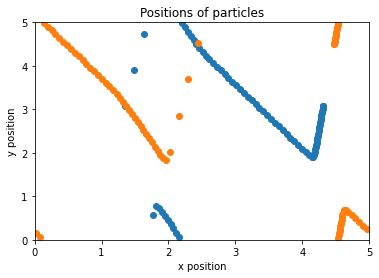

In [10]:
#Scatter plot
plt.scatter(part_1[0], part_1[1] )
plt.scatter(part_2[0], part_2[1])
plt.title("Positions of particles")
plt.xlabel("x position")
plt.ylabel("y position")
plt.xlim(0.0, 5.)
plt.ylim(0, 5)
plt.show()